## PART 3

In [11]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
import time

#### -------- Load and prepare the dataset --------

In [12]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=column_names)

# diagnosis ----> (M = 1, B = 0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
data = data.drop('ID', axis=1)

X = data.drop('Diagnosis', axis=1).values
y = data['Diagnosis'].values
    
X.shape, y.shape

((569, 30), (569,))

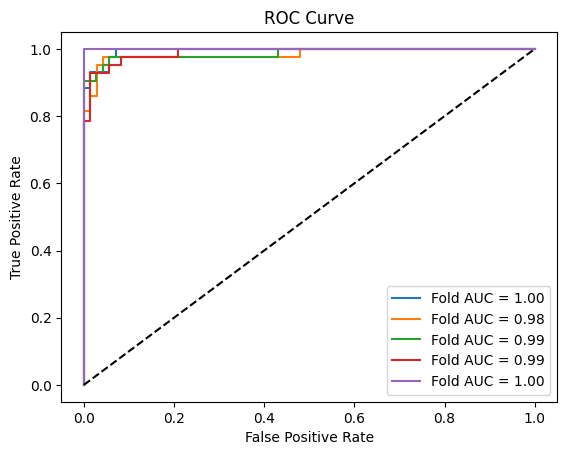

Average ROC AUC: 0.99
Confusion Matrix for Fold 1:
[[66  5]
 [ 0 43]]

Confusion Matrix for Fold 2:
[[68  3]
 [ 1 42]]

Confusion Matrix for Fold 3:
[[68  4]
 [ 1 41]]

Confusion Matrix for Fold 4:
[[71  1]
 [ 3 39]]

Confusion Matrix for Fold 5:
[[71  0]
 [ 0 42]]

Total time: 9.26 seconds


In [13]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import time

start_time = time.time()
svm = SVC(kernel='linear', probability=True, random_state=42)

# k-Fold 
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_aucs = []
conf_matrices = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    svm.fit(X_train, y_train)
    y_probs = svm.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)
    
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    
    y_pred = (y_probs >= optimal_threshold).astype(int)
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    
    plt.plot(fpr, tpr, label=f'Fold AUC = {roc_auc:.2f}')
    


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'Average ROC AUC: {np.mean(roc_aucs):.2f}')

# confusion matrice
for i, cm in enumerate(conf_matrices, 1):
    print(f'Confusion Matrix for Fold {i}:\n{cm}\n')

# timing
end_time = time.time()
print(f'Total time: {end_time - start_time:.2f} seconds')



```markdown
#### Results Summary
The SVM classifier with a linear kernel achieved an average ROC AUC of approximately 0.99 across 5-fold cross-validation, indicating excellent performance in distinguishing between malignant and benign cases. 
The confusion matrices show minimal misclassifications, with some folds achieving perfect classification. 
```